In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# EDA
Scatterplot

<AxesSubplot:xlabel='TV', ylabel='sales'>

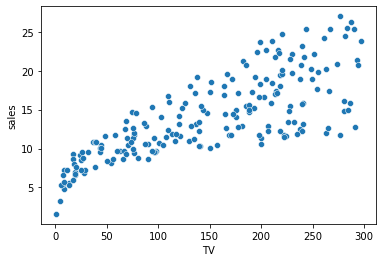

In [6]:
import seaborn as sns
sns.scatterplot(x="TV",y="sales",data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

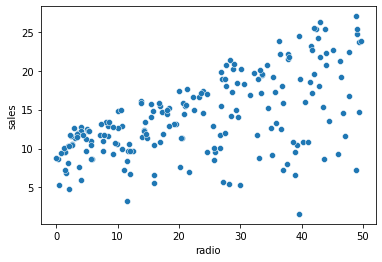

In [8]:
import seaborn as sns
sns.scatterplot(x="radio",y="sales",data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

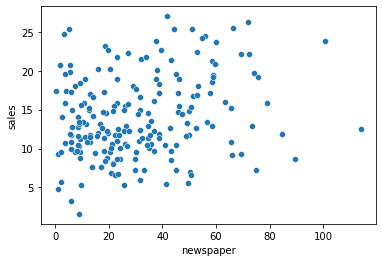

In [9]:
import seaborn as sns
sns.scatterplot(x="newspaper",y="sales",data=df)

# Correlation

In [10]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

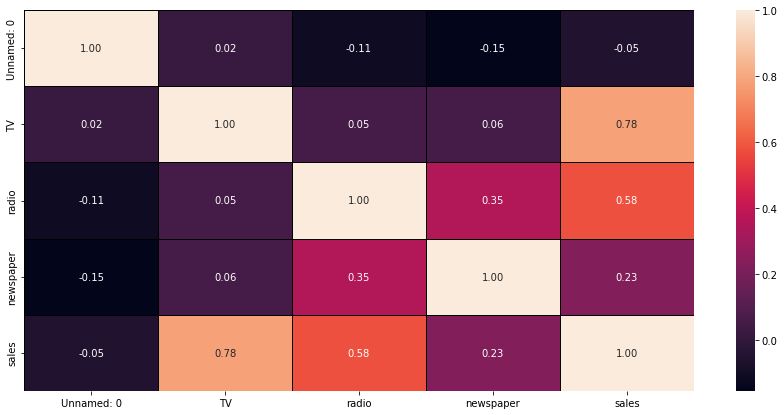

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt=".2f")

# Outcome of Correlation
All the columnsv of dataset is positivly correlated to the target columns

max correlation with :- TV

min correlation with :- newspaper

# Describing Dataset

In [12]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


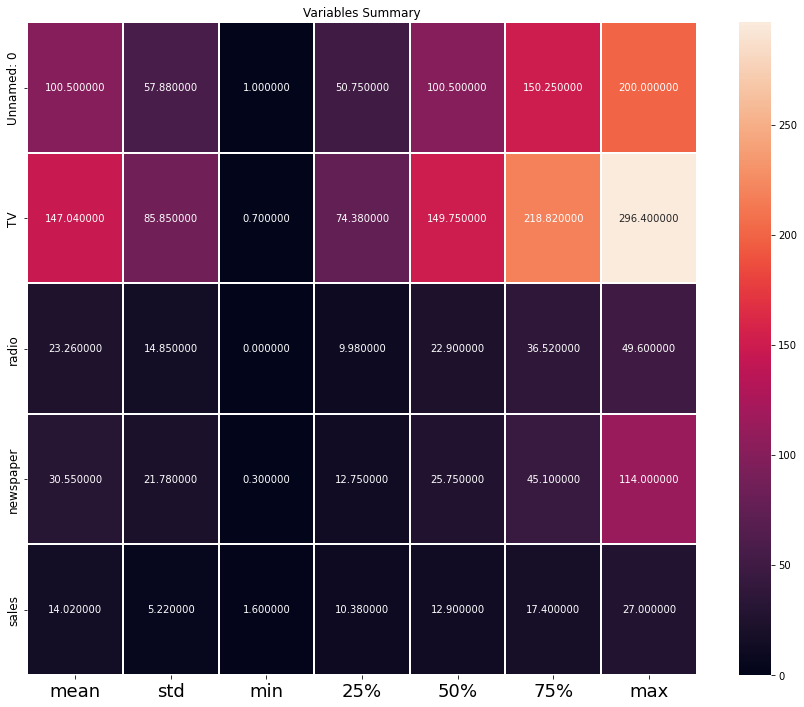

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Outliers Checking:

C:\Users\Nirav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nirav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Nirav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nirav\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

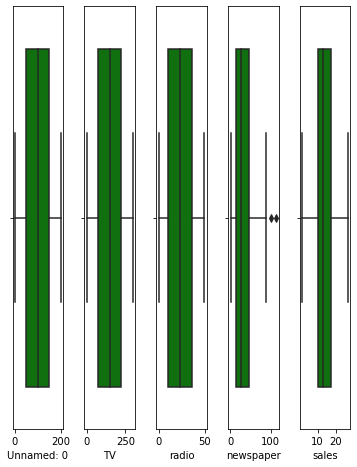

In [15]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness

In [17]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# Normal Distribution Curve:

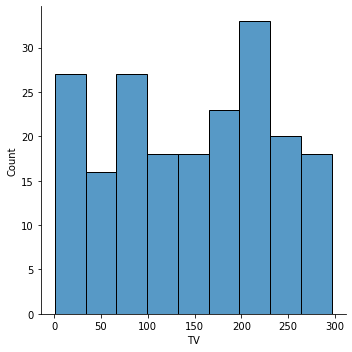

In [18]:
sns.displot(df["TV"])

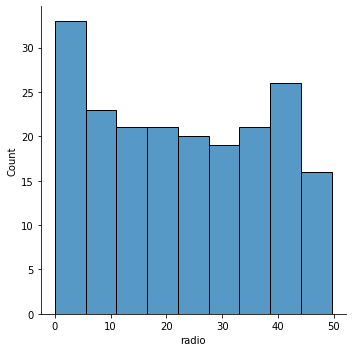

In [19]:
sns.displot(df["radio"])

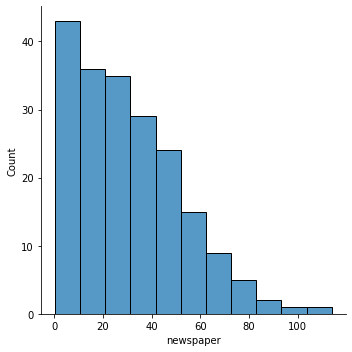

In [20]:
sns.displot(df["newspaper"])

# Removing outliers:
z-score Technique:

In [21]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(200, 5)

In [22]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [23]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 5)
(198, 5)


# Percentage data loss:

In [24]:
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


# Model without outliers is df and model with desired outliers is df_new1

In [25]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# Transforming data to remove skewness

In [27]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [28]:
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

# Since the outcome has only two variable we willuse binary classification model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Encoding of Dataframe

In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [39]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Describe the dataset

In [41]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

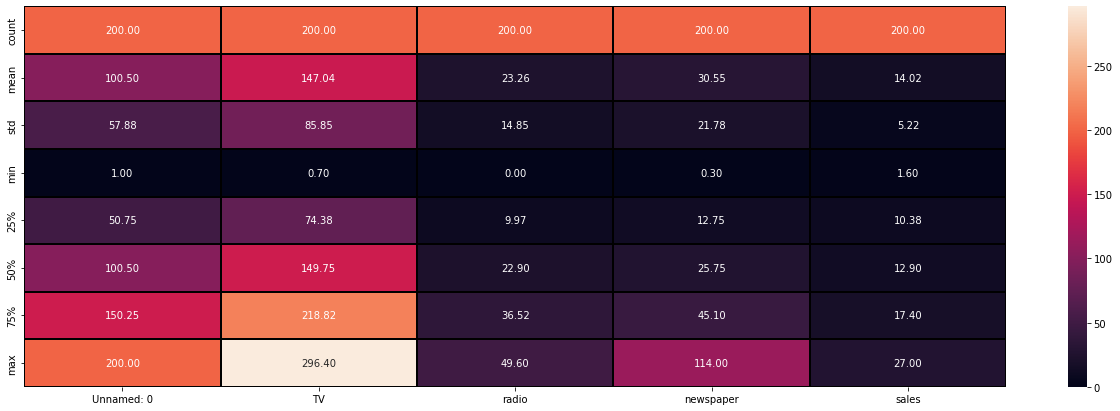

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation with target columns

In [43]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

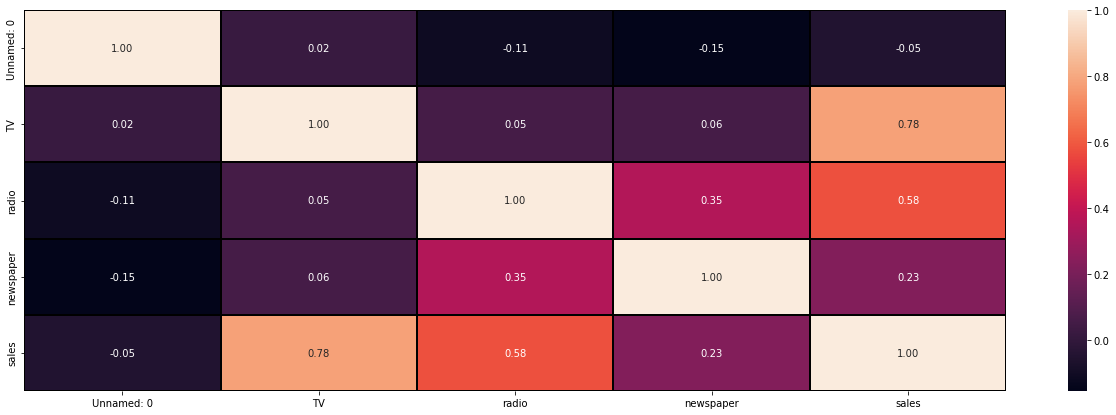

In [44]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

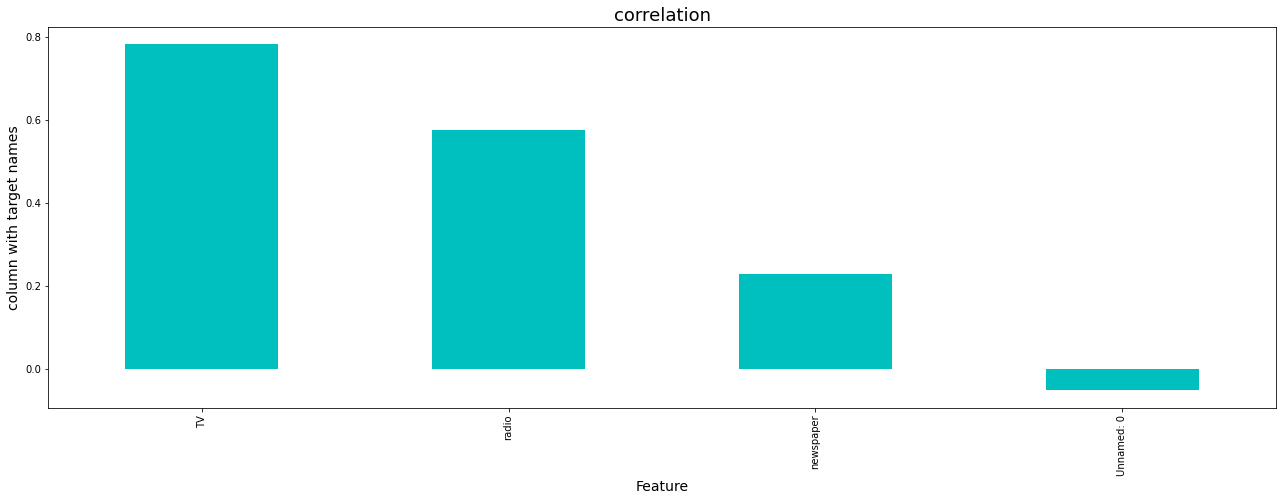

In [46]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [47]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# Outliers checking

In [48]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

<AxesSubplot:>

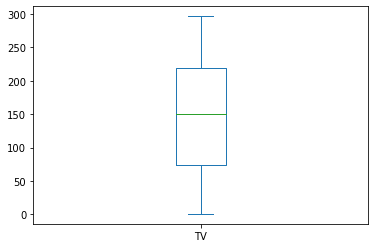

In [49]:
df['TV'].plot.box()

<AxesSubplot:>

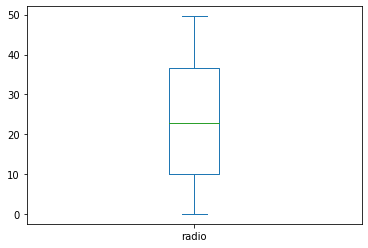

In [50]:
df['radio'].plot.box()

<AxesSubplot:>

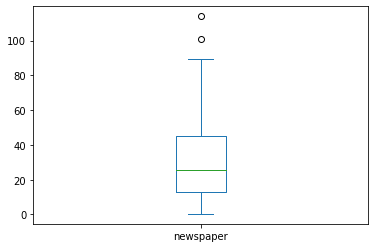

In [51]:
df['newspaper'].plot.box()

<AxesSubplot:>

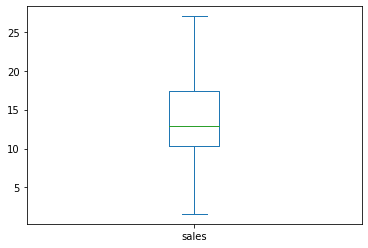

In [52]:
df['sales'].plot.box()

# Considering the outliers removal

In [53]:
df.shape

(200, 5)

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [55]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [56]:
df_new_z.shape

(198, 5)

In [57]:
Data_loss=((200-198)/200)*100

In [59]:
Data_loss

1.0

# Separating the columns into features and target

In [61]:
features=df.drop("sales",axis=1)
target=df["sales"]

# Scaling the data using Min-max scalar

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.9073274552252846
At random state 0,the testing accuracy is :- 0.856480214327925


At random state 1,the training accuracy is :- 0.8959391993971187
At random state 1,the testing accuracy is :- 0.8928781912093181


At random state 2,the training accuracy is :- 0.9152614531156523
At random state 2,the testing accuracy is :- 0.7570326409482367


At random state 3,the training accuracy is :- 0.8931443451313652
At random state 3,the testing accuracy is :- 0.9134449674582059


At random state 4,the training accuracy is :- 0.8911682084041699
At random state 4,the testing accuracy is :- 0.9084934434517352


At random state 5,the training accuracy is :- 0.89570620107301
At random state 5,the testing accuracy is :- 0.89851958363058


At random state 6,the training accuracy is :- 0.8915582028345674
At random state 6,the testing accuracy is :- 0.921941222913581


At random state 7,the training accuracy is :- 0.8929171093102488
At random state 7,the te

At random state 71,the training accuracy is :- 0.9170792242159567
At random state 71,the testing accuracy is :- 0.8214330315197064


At random state 72,the training accuracy is :- 0.8939630309765105
At random state 72,the testing accuracy is :- 0.9063814288042916


At random state 73,the training accuracy is :- 0.9081745525874727
At random state 73,the testing accuracy is :- 0.838245651416483


At random state 74,the training accuracy is :- 0.8980451797105264
At random state 74,the testing accuracy is :- 0.8802918295913446


At random state 75,the training accuracy is :- 0.8944097316106918
At random state 75,the testing accuracy is :- 0.9074740863261651


At random state 76,the training accuracy is :- 0.9092071576699313
At random state 76,the testing accuracy is :- 0.7531289748171518


At random state 77,the training accuracy is :- 0.8859821552154192
At random state 77,the testing accuracy is :- 0.937956975915543


At random state 78,the training accuracy is :- 0.8957614044756782
At ra

In [65]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [66]:
lr.fit(features_train,target_train)

LinearRegression()

In [67]:
pred_test=lr.predict(features_test)

In [68]:
print(r2_score(target_test,pred_test))

0.9110007582766769


# Crosss-validation of the model

In [69]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8557808905096393 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 3 the cv score is 0.8913539823868294 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 4 the cv score is 0.8858779626590163 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 5 the cv score is 0.8842777844741689 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 6 the cv score is 0.8877823078964706 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 7 the cv score is 0.8830284351379021 and accuracy score for training is -1.1005688286388935 and accuracy for the testing is 0.9110007582766769


At cross fold 8 the cv score is 0.879505934736

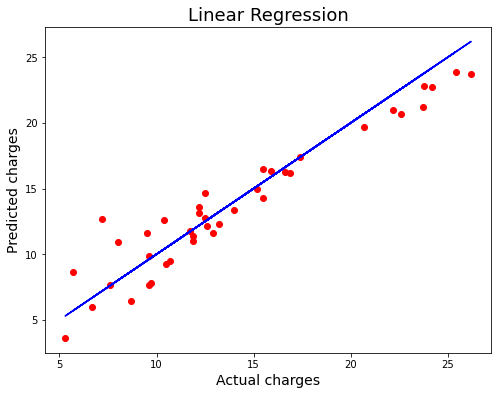

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [72]:
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [73]:
ls = Lasso(alpha=0.01,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.9110263280759735

In [74]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8842974176393481

# Ensemble technique

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [77]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.14539995384297
Cross Val Score: 97.36411569084439


# We are getting model accuracy 98.14% and cross validation 97.36%

In [78]:
import pickle
filename = 'Advertising_Sales_Channel_Prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))